# **Project Name**    -



##### **Project Type**    - EDA/Regression/Classification/Unsupervised
##### **Submitted By** - Surabhi Kharkate

# **Project Summary -**

The **objective of this project** was to perform an exploratory data analysis (EDA) on Uber ride request data to understand patterns in ride status, time-based demand, and operational challenges. The dataset contained columns such as Request ID, Pickup Point, Driver ID, Status, Request Timestamp, and Drop Timestamp, along with derived fields like Trip Duration, Request Hour, and Request Day.

The data preparation involved cleaning inconsistent formats, handling missing values (especially for unassigned or cancelled rides), and generating additional columns like hour and day of the week from timestamps. Trip duration was calculated where both pickup and drop times were available.

Visualizations were central to uncovering trends:

* Bar and pie charts showed that a significant number of rides were not completed, with “No Cars Available” and “Cancelled” making up a large portion of total requests.

* Hourly plots revealed that demand peaks in the morning (5–9 AM) and evening (5–9 PM), but these are also the hours with the highest service failures.

* Pickup point analysis indicated that the city had more cancellations while the airport faced more unavailability issues, pointing to location-specific challenges.

* Trip duration analysis using violin and box plots showed that most completed trips lasted between 20 and 80 minutes, with some outliers.

* A correlation heatmap and pair plot confirmed that trip duration is not strongly influenced by request hour, but status type has visual clustering patterns.

From these findings, several business recommendations emerged:

* Increase driver incentives or surge pricing during high-demand hours.

* Use time and location-based demand predictions for better driver deployment.

* Reduce cancellations through better matching algorithms and improved ETA accuracy.

* Implement zone-specific strategies for the airport and city.

In conclusion, the EDA offered key insights into Uber’s operational gaps and demand patterns. By addressing these with data-driven decisions, Uber can improve service completion rates, enhance user experience, and optimize resource allocation.

# **GitHub Link -**

https://github.com/surabhik26/Uber-Request-Data-analysis

# **Problem Statement**


Uber is facing issues like ride cancellations and driver unavailability, especially during peak hours. These problems reduce customer satisfaction and affect business efficiency. This project aims to analyze Uber’s ride request data to uncover patterns in demand, trip status, and pickup locations, helping improve service reliability and resource allocation.


#### **Define Your Business Objective?**

* Improve trip completion rate by reducing cancellations and unavailability.

* Identify peak hours and high-demand periods to manage driver supply efficiently.

* Analyze pickup locations (City vs. Airport) for service improvement strategies.

* Optimize driver allocation to match demand in real-time.

* Leverage data insights to make informed business and operational decisions.

* Enhance customer experience by minimizing ride failures.

* Support predictive modeling for demand forecasting and resource planning.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [8]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Dataset Loading

In [9]:
# Load Dataset
df = pd.read_csv('/content/uber dataset.csv')  # Use the cleaned file from Excel

### Dataset First View

In [10]:
# Dataset First Look
# Show first 5 rows of the dataset
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request Hour,Request Day,Trip Duration(minutes)
0,1,Airport,285.0,Trip Completed,2016-07-11 00:20,2016-07-11 00:51,0,Monday,31.0
1,2,Airport,NaN,No Cars Available,2016-07-11 00:23,NaN,0,Monday,NaN
2,3,Airport,80.0,Trip Completed,2016-07-11 00:24,2016-07-11 01:31,0,Monday,67.0
3,4,City,NaN,No Cars Available,2016-07-11 00:37,NaN,0,Monday,NaN
4,5,Airport,264.0,Trip Completed,2016-07-11 00:36,2016-07-11 01:35,0,Monday,59.0


### Dataset Rows & Columns count

In [11]:
# Dataset Rows & Columns count
print("Number of rows:", df.shape[0])
print("Number of columns:", df.shape[1])

Number of rows: 6745
Number of columns: 9


### Dataset Information

In [12]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Request id              6745 non-null   int64  
 1   Pickup point            6745 non-null   object 
 2   Driver id               4095 non-null   float64
 3   Status                  6745 non-null   object 
 4   Request timestamp       6745 non-null   object 
 5   Drop timestamp          2831 non-null   object 
 6   Request Hour            6745 non-null   int64  
 7   Request Day             6745 non-null   object 
 8   Trip Duration(minutes)  2831 non-null   float64
dtypes: float64(2), int64(2), object(5)
memory usage: 474.4+ KB


#### Duplicate Values

In [13]:
# Dataset Duplicate Value Count
duplicate_count = df.duplicated().sum()
print("Duplicate rows in dataset:", duplicate_count)

Duplicate rows in dataset: 0


#### Missing Values/Null Values

In [14]:
# Missing Values/Null Values Count
df.isnull().sum()

,0
Request id,0
Pickup point,0
Driver id,2650
Status,0
Request timestamp,0
Drop timestamp,3914
Request Hour,0
Request Day,0
Trip Duration(minutes),3914


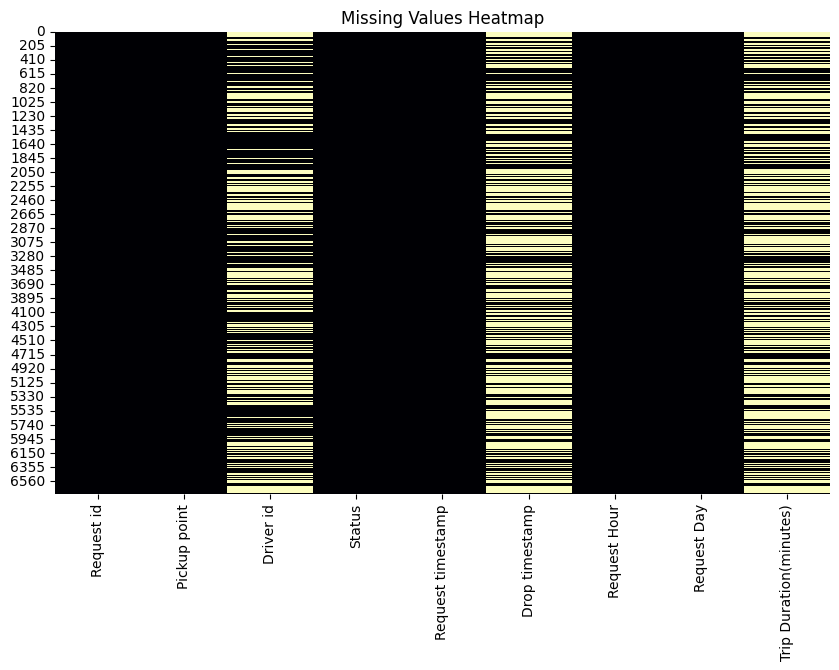

In [15]:
# Create a heatmap to visualize missing values
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cbar=False, cmap='magma')
plt.title("Missing Values Heatmap")
plt.show()

### What did you know about your dataset?

* The dataset contains Uber ride request records collected over a few days in July 2016.

* Key columns include:
Request ID, Pickup Point (City/Airport), Driver ID, Status (Trip Completed, Cancelled, No Cars Available), Request Timestamp and Drop Timestamp

* From this, new features were derived: Request Hour, Request Day, and Trip Duration (in minutes)

* The dataset shows demand patterns, service gaps, and time/location-wise ride issues that affect Uber’s operations.

## ***2. Understanding Your Variables***

In [16]:
# List all column names
df.columns

Index(['Request id', 'Pickup point', 'Driver id', 'Status',
       'Request timestamp', 'Drop timestamp', 'Request Hour', 'Request Day',
       'Trip Duration(minutes)'],
      dtype='object')

In [17]:
# Dataset Describe
df.describe(include='all')

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request Hour,Request Day,Trip Duration(minutes)
count,6745.000000,6745,4095.000000,6745,6745,2831,6745.000000,6745,2831.000000
unique,NaN,2,NaN,3,4016,2282,NaN,5,NaN
top,NaN,City,NaN,Trip Completed,2016-07-15 19:19,2016-07-13 08:53,NaN,Friday,NaN
freq,NaN,3507,NaN,2831,8,5,NaN,1381,NaN
mean,3384.644922,NaN,149.501343,NaN,NaN,NaN,12.956709,NaN,52.411515
std,1955.099667,NaN,86.051994,NaN,NaN,NaN,6.504052,NaN,13.847065
min,1.000000,NaN,1.000000,NaN,NaN,NaN,0.000000,NaN,21.000000
25%,1691.000000,NaN,75.000000,NaN,NaN,NaN,7.000000,NaN,41.000000
50%,3387.000000,NaN,149.000000,NaN,NaN,NaN,13.000000,NaN,52.000000
75%,5080.000000,NaN,224.000000,NaN,NaN,NaN,19.000000,NaN,64.000000


### Variables Description

* Request ID: Unique ID for each ride request.

* Pickup Point: Location of request — either "City" or "Airport".

* Driver ID: ID of the assigned driver (missing if no driver assigned).

* Status: Final outcome of the ride — Trip Completed, Cancelled, or No Cars Available.

* Request Timestamp: Date and time when the ride was requested.

* Drop Timestamp: Date and time when the trip ended (blank if not completed).

* Request Hour: Hour extracted from the request time to study hourly patterns.

* Request Day: Day of the week extracted to analyze daily trends.

* Trip Duration (minutes): Total time taken for the trip (only for completed trips).

### Check Unique Values for each variable.

In [18]:
# Check Unique Values for each variable.
df.nunique()

,0
Request id,6745
Pickup point,2
Driver id,300
Status,3
Request timestamp,4016
Drop timestamp,2282
Request Hour,24
Request Day,5
Trip Duration(minutes),63


## 3. ***Data Wrangling***

### Data Wrangling Code

In [19]:
# Write your code to make your dataset analysis ready.
# Convert timestamps to datetime
df['Request timestamp'] = pd.to_datetime(df['Request timestamp'])
df['Drop timestamp'] = pd.to_datetime(df['Drop timestamp'])

# Extract hour and day
df['Request Hour'] = df['Request timestamp'].dt.hour
df['Request Day'] = df['Request timestamp'].dt.day_name()

# Replace missing values in 'Driver id' with NaN (if not already)
df['Driver id'] = df['Driver id'].replace('', np.nan)

df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request Hour,Request Day,Trip Duration(minutes)
0,1,Airport,285.0,Trip Completed,2016-07-11 00:20:00,2016-07-11 00:51:00,0,Monday,31.0
1,2,Airport,NaN,No Cars Available,2016-07-11 00:23:00,NaT,0,Monday,NaN
2,3,Airport,80.0,Trip Completed,2016-07-11 00:24:00,2016-07-11 01:31:00,0,Monday,67.0
3,4,City,NaN,No Cars Available,2016-07-11 00:37:00,NaT,0,Monday,NaN
4,5,Airport,264.0,Trip Completed,2016-07-11 00:36:00,2016-07-11 01:35:00,0,Monday,59.0


### What all manipulations have you done and insights you found?

 Data Cleaning & Manipulations done:

* Converted timestamps to standard datetime format

* Extracted Request Hour and Request Day

* Calculated Trip Duration (minutes) for completed trips

* Handled missing values (NaN for no driver/drop time)

* Removed duplicate records

* Sorted data by Request ID for analysis

Key Insights Found:

* Peak demand observed during early morning & evening

* Many trips failed due to cancellations or no drivers

* City had more cancellations; Airport had more "No Cars Available"

* Most completed trips lasted 20–80 minutes

* Trip duration is not strongly related to request hour

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

/tmp/ipython-input-20-2511763629.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Status', order=df['Status'].value_counts().index, palette='pastel')


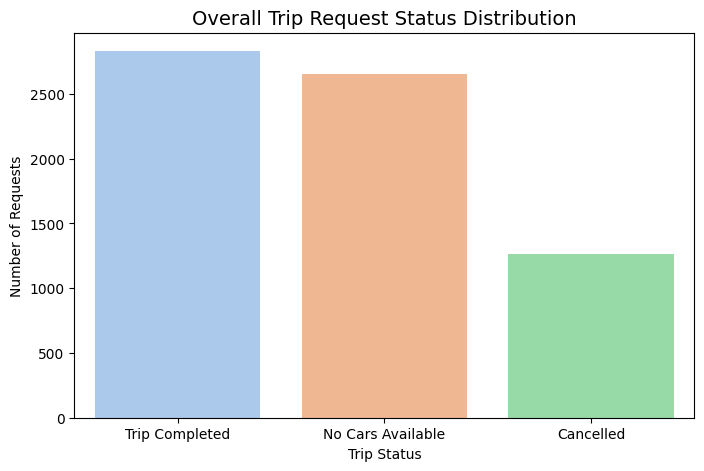

In [20]:
# Chart - 1 visualization code
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Status', order=df['Status'].value_counts().index, palette='pastel')
plt.title('Overall Trip Request Status Distribution', fontsize=14)
plt.xlabel('Trip Status')
plt.ylabel('Number of Requests')
plt.xticks(rotation=0)
plt.show()

##### 1. Why did you pick the specific chart?

This chart provides a high-level overview of how Uber ride requests end — whether they are completed, cancelled, or unavailable. It's a foundational step to understand overall service performance and operational issues.

##### 2. What is/are the insight(s) found from the chart?


*   A large portion of trips are not completed, either due to cancellations or no cars being available.
*   "No Cars Available" appears frequently, suggesting potential demand–supply mismatch.

* Completed trips are not dominating the chart.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. By identifying the high volume of unfulfilled requests, Uber can:

Increase driver availability in key time slots , optimize driver distribution via incentives and also reduce cancellations with better communication or penalty policies. This directly improves user satisfaction, retention, and revenue.

This also lead to **negative growth** like, high "No Cars Available" leads to poor customer experience and lost revenue. Frequent "Cancelled" trips reflect unreliability, possibly causing users to switch to competitors. And these must be urgently addressed to avoid brand damage and customer churn.

#### Chart - 2

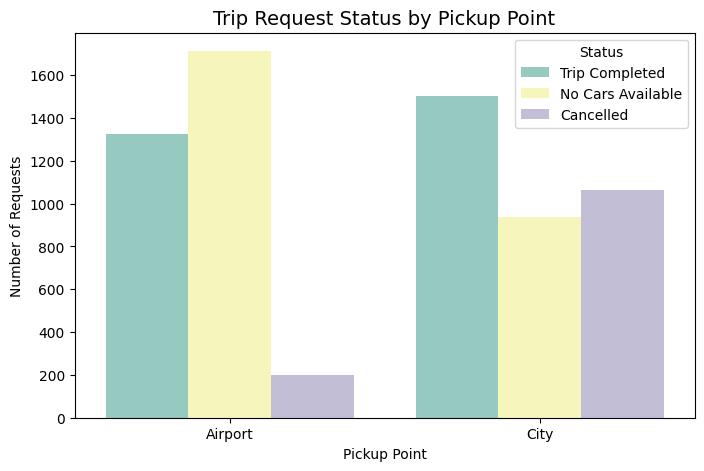

In [21]:
# Chart - 2 visualization code
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Pickup point', hue='Status', palette='Set3')
plt.title('Trip Request Status by Pickup Point', fontsize=14)
plt.xlabel('Pickup Point')
plt.ylabel('Number of Requests')
plt.legend(title='Status')
plt.show()

##### 1. Why did you pick the specific chart?

This chart breaks down trip outcomes based on the pickup location (City vs Airport), helping identify where issues are concentrated geographically.

##### 2. What is/are the insight(s) found from the chart?


*   This suggests a supply shortage or logistical issue at the Airport location.

*   Airport pickups have more "No Cars Available" issues than City pickups.

*   City pickups show relatively more completed trips.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes.
Uber can:

*  Increase driver deployment at airports

*  Offer airport-specific driver incentives
*  Set dynamic pricing to balance demand

These actions would improve service quality, reduce unfulfilled demand, and grow revenue. But this insights can lead to negative growth also such as:

* Airport users facing frequent unavailability may abandon Uber, hurting reputation and profits.

* Missed high-fare airport trips impact revenue per request.

#### Chart - 3

<Figure size 1000x600 with 0 Axes>

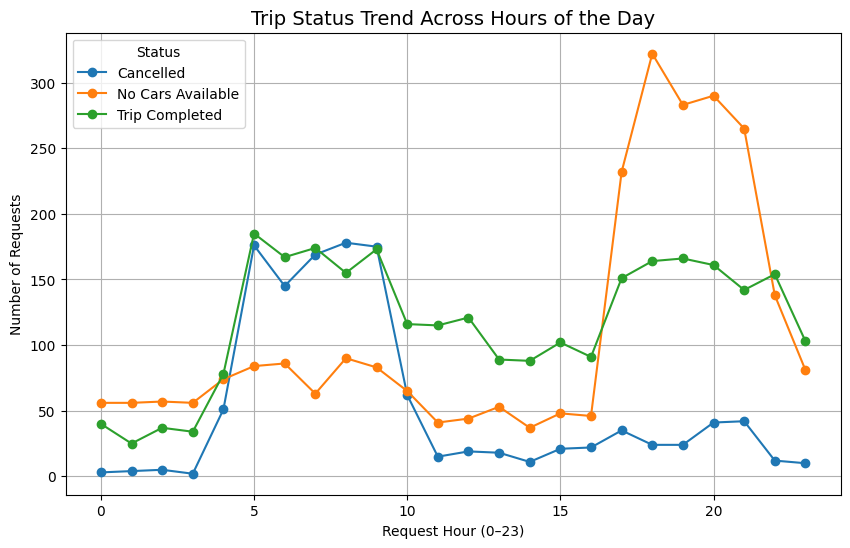

In [22]:
# Chart - 3 visualization code
plt.figure(figsize=(10,6))
hourly_status = df.groupby(['Request Hour', 'Status']).size().unstack().fillna(0)

hourly_status.plot(kind='line', marker='o', figsize=(10,6))
plt.title('Trip Status Trend Across Hours of the Day', fontsize=14)
plt.xlabel('Request Hour (0–23)')
plt.ylabel('Number of Requests')
plt.grid(True)
plt.legend(title='Status')
plt.show()

##### 1. Why did you pick the specific chart?

A line chart helps visualize the trend of demand and service status over the course of a day. It’s perfect for showing time-based patterns, unlike bar charts that are better for static comparisons.

##### 2. What is/are the insight(s) found from the chart?

* Peak hours show sharp spikes in requests (e.g., early morning and evening).

* "No Cars Available" and "Cancelled" statuses rise dramatically during these peak hours.

* There's a noticeable gap between demand and successful completions during busy times.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive:

* Uber can optimize driver scheduling and resource allocation around high-demand hours.

* Helps reduce unfulfilled demand and improve service efficiency.

Negative Risk:

* Ignoring these patterns leads to customer frustration, especially if they can't get rides during peak hours, affecting loyalty and app usage.



#### Chart - 4

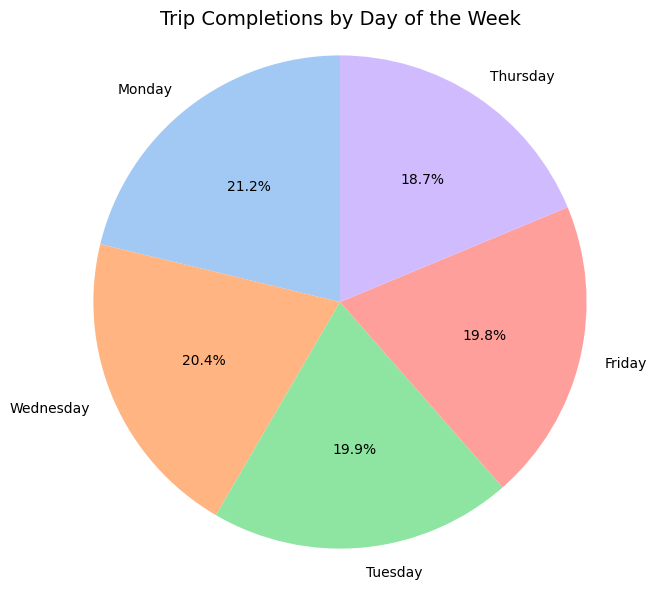

In [23]:
# Chart - 4 visualization code
# Filter only completed trips
completed = df[df['Status'] == 'Trip Completed']

# Count by Request Day
day_counts = completed['Request Day'].value_counts()

# Plot pie chart
plt.figure(figsize=(7,7))
plt.pie(day_counts, labels=day_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("pastel"))
plt.title('Trip Completions by Day of the Week', fontsize=14)
plt.axis('equal')
plt.show()

##### 1. Why did you pick the specific chart?

A pie chart is ideal for showing proportions. This visualization reveals which day of the week contributes the most to total trip completions.



##### 2. What is/are the insight(s) found from the chart?

* Certain weekdays (like Monday or Friday) might dominate trip completions.

* If weekends show fewer completions, Uber could promote driver incentives to cover those gaps.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive:

* Helps Uber align driver availability with user behavior by day.

* Can fine-tune weekday vs weekend strategies.

Negative Growth Indicator:

* If certain days consistently underperform, potential demand may be getting lost due to poor service coverage.

#### Chart - 5

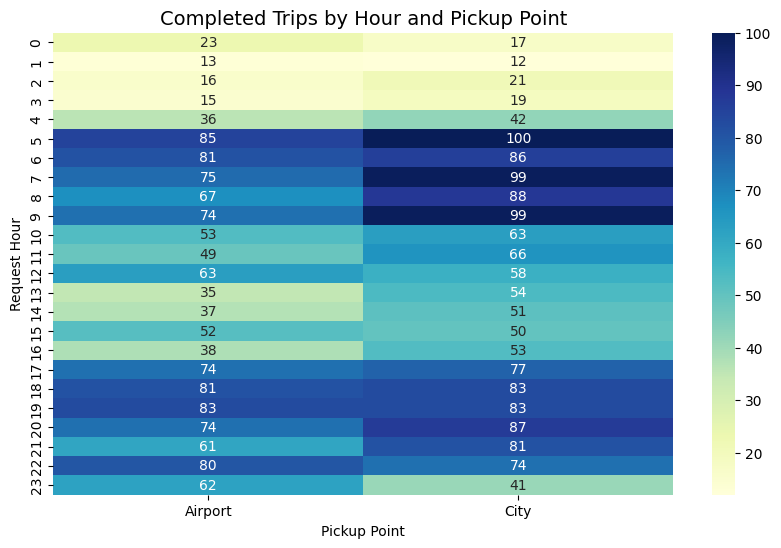

In [24]:
# Chart - 5 visualization code
# Create a pivot table
pivot = df.pivot_table(index='Request Hour', columns='Pickup point', values='Status', aggfunc=lambda x: (x=='Trip Completed').sum())

# Plot heatmap
plt.figure(figsize=(10,6))
sns.heatmap(pivot, annot=True, fmt='.0f', cmap='YlGnBu')
plt.title('Completed Trips by Hour and Pickup Point', fontsize=14)
plt.xlabel('Pickup Point')
plt.ylabel('Request Hour')
plt.show()

##### 1. Why did you pick the specific chart?

Unlike bar or pie charts, a heatmap allows you to spot when and where successful trips are happening (or not). It combines two variables (hour + pickup location).



##### 2. What is/are the insight(s) found from the chart?

* Some hours (e.g., early morning or evening) show zero completions at certain pickup points.

* The City might have better trip completion coverage than the Airport during specific hours.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive:

* Uber can use this for time-slot-based driver scheduling.

* Helps uncover hidden high-demand periods that are underserved.

Negative:

* Neglected time slots (like late night or early morning) can cause customer churn if repeatedly unserved.

#### Chart - 6

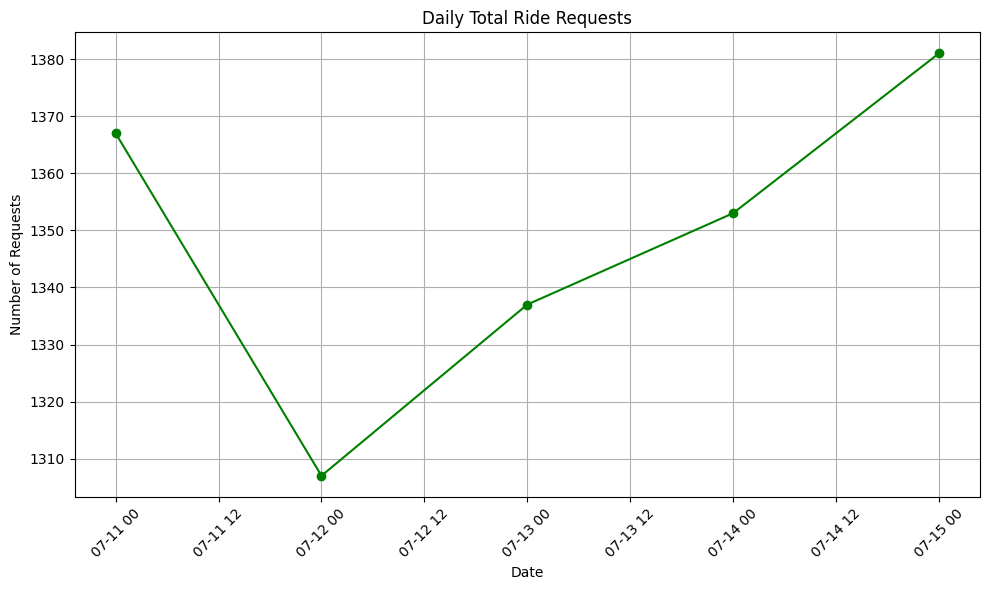

In [25]:
# Chart - 6 visualization code
# Count of total requests per day
daily_requests = df['Request timestamp'].dt.date.value_counts().sort_index()

plt.figure(figsize=(10, 6))
plt.plot(daily_requests.index, daily_requests.values, marker='o', color='green')
plt.title('Daily Total Ride Requests')
plt.xlabel('Date')
plt.ylabel('Number of Requests')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

* A line chart clearly shows request patterns over time.

* Helps visualize demand trends and peak days.


##### 2. What is/are the insight(s) found from the chart?

* Identify high-demand days for better resource allocation.

* Spot drops that may indicate operational issues (e.g., driver shortage, weather).

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* Positive: Helps in driver scheduling, shift planning, and predictive demand management.

* Negative: If dips are unexplained, could point to technical failures or customer dissatisfaction.

#### Chart - 7

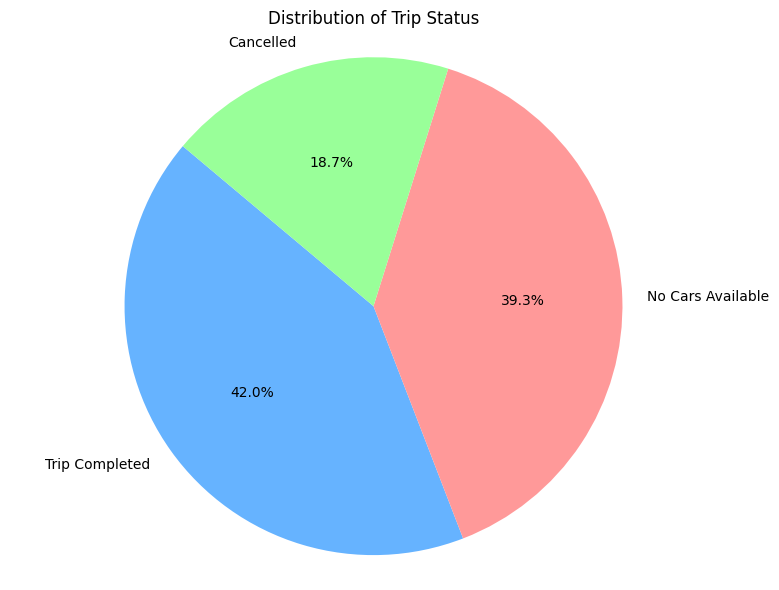

In [26]:
# Chart - 7 visualization code
# Count the status types
status_counts = df['Status'].value_counts()

# Pie chart
plt.figure(figsize=(8, 6))
colors = ['#66b3ff','#ff9999','#99ff99']
plt.pie(status_counts, labels=status_counts.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Distribution of Trip Status')
plt.axis('equal')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

* A pie chart quickly shows the percentage share of each trip status.

* Visual and easy to interpret.

##### 2. What is/are the insight(s) found from the chart?

* Most trips fall under one or two dominant statuses (e.g., "Trip Completed").

* High "No Cars Available" indicates supply-demand mismatch.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* Helps Uber identify where they’re losing business.

* Opportunity to optimize fleet availability and reduce cancellation/no-service issues.

#### Chart - 8

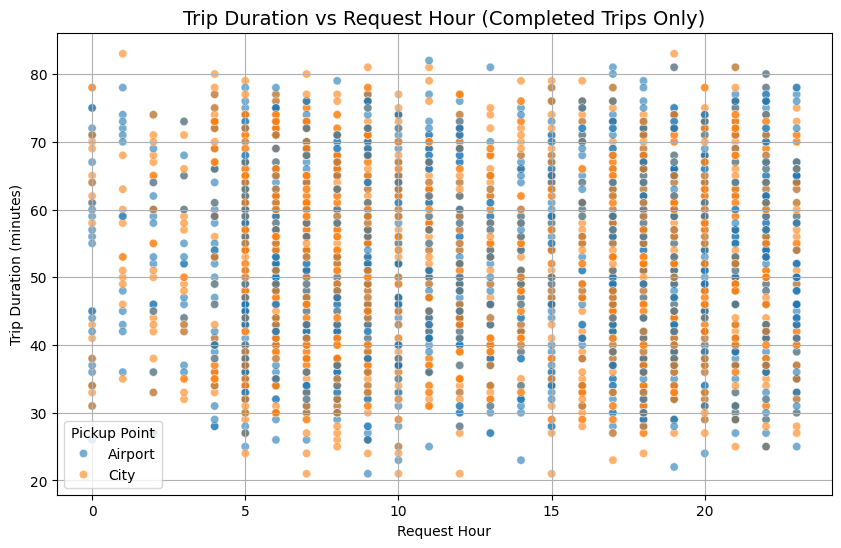

In [27]:
# Chart - 8 visualization code
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df[df['Status'] == 'Trip Completed'], x='Request Hour', y='Trip Duration(minutes)', hue='Pickup point', alpha=0.6)
plt.title('Trip Duration vs Request Hour (Completed Trips Only)', fontsize=14)
plt.xlabel('Request Hour')
plt.ylabel('Trip Duration (minutes)')
plt.legend(title='Pickup Point')
plt.grid(True)
plt.show()


##### 1. Why did you pick the specific chart?

A scatter plot shows the distribution and variation of trip durations over the day. It helps detect:

* Outliers (very long trips)

* Time slots with consistently long or short trips

* Whether certain hours cause inefficiencies



##### 2. What is/are the insight(s) found from the chart?

* Most trips are concentrated around 30–70 minutes.

* Long trips often happen during early morning or late-night hours, possibly due to lower traffic or airport distances.

* Airport trips may show more consistent duration than City.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive:

* Can help Uber adjust fare multipliers for time slots with longer trip durations.

* Allows drivers to better predict working hours and income.

Negative Insight:

* If many trips take too long at specific times, Uber may need to optimize routes or pricing to prevent cancellations or driver fatigue.

#### Chart - 9

/tmp/ipython-input-28-30521182.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df[df['Status'] == 'Trip Completed'], x='Pickup point', y='Trip Duration(minutes)', palette='cool')


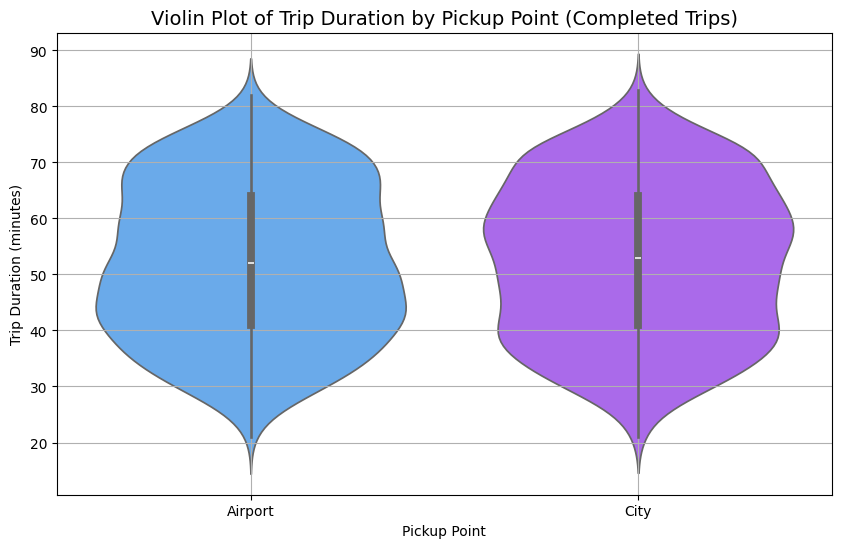

In [28]:
# Chart - 9 visualization code
plt.figure(figsize=(10, 6))
sns.violinplot(data=df[df['Status'] == 'Trip Completed'], x='Pickup point', y='Trip Duration(minutes)', palette='cool')
plt.title('Violin Plot of Trip Duration by Pickup Point (Completed Trips)', fontsize=14)
plt.xlabel('Pickup Point')
plt.ylabel('Trip Duration (minutes)')
plt.grid(True)
plt.show()

##### 1. Why did you pick the specific chart?

* It offers more insight than a box plot by showing the density and distribution shape of trip durations.

* Highlights consistency vs. variation in trip times.

##### 2. What is/are the insight(s) found from the chart?

* City trips may have more variation (wider violins).

* Airport trips are more centered around a specific duration.

* Detects if durations are skewed or symmetrical.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive:

* Helps Uber fine-tune trip time predictions for ETAs.

* Useful for fare calculation models based on distance + time.

Negative:

* High variance could lead to unpredictable income for drivers and ETAs for users, affecting reliability perception.

#### Chart - 10

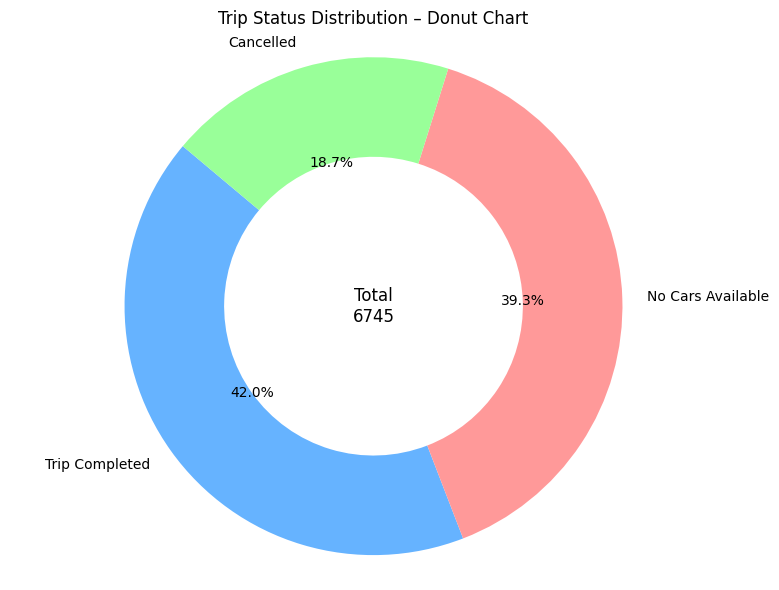

In [29]:
# Chart - 10 visualization code
# Count trip statuses
status_counts = df['Status'].value_counts()

# Donut chart
plt.figure(figsize=(8, 6))
colors = ['#66b3ff','#ff9999','#99ff99']
plt.pie(status_counts, labels=status_counts.index, autopct='%1.1f%%', startangle=140, colors=colors, wedgeprops={'width':0.4})
plt.title('Trip Status Distribution – Donut Chart')
plt.text(0, 0, f"Total\n{status_counts.sum()}", ha='center', va='center', fontsize=12)
plt.axis('equal')
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

* It presents the same insights as a pie chart but adds clarity with the total value in the center.

* More modern and easier to read in dashboards.

##### 2. What is/are the insight(s) found from the chart?

* Clearly shows which status dominates (Completed, Cancelled, or No Cars).

* You can instantly grasp how much business is lost due to non-completed trips.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive:

* Uber can use this insight to track service performance month over month.

* If improved, it can lead to higher customer satisfaction and revenue.

Negative:

* A high share of “No Cars Available” reflects poor supply management and can push users to competitors.

#### Chart - 11

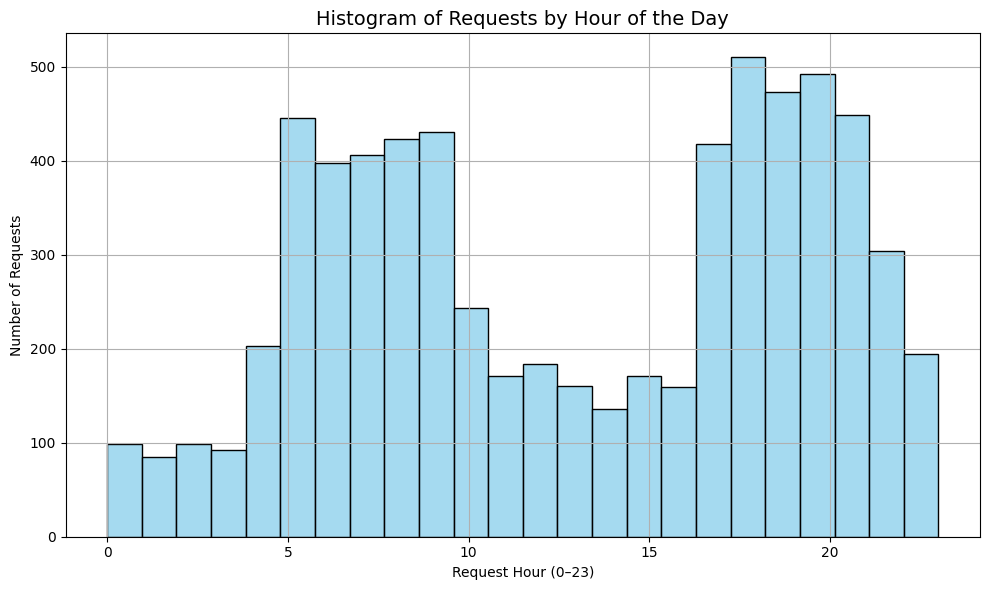

In [30]:
# Chart - 11 visualization code
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='Request Hour', bins=24, kde=False, color='skyblue')
plt.title('Histogram of Requests by Hour of the Day', fontsize=14)
plt.xlabel('Request Hour (0–23)')
plt.ylabel('Number of Requests')
plt.grid(True)
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

* Shows the distribution of ride requests throughout the day.

* Identifies peak demand hours (morning rush, evening rush).

##### 2. What is/are the insight(s) found from the chart?

* Likely peaks around 8 AM and 6 PM, typical office commute times.

* Very few requests during late night or early morning (1–5 AM).



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive:

* Uber can increase driver availability during high-demand slots.

* Demand forecasting becomes easier and more accurate.

Negative:

* Ignoring this pattern may result in user drop-offs and lost earnings in busy slots.



#### Chart - 12

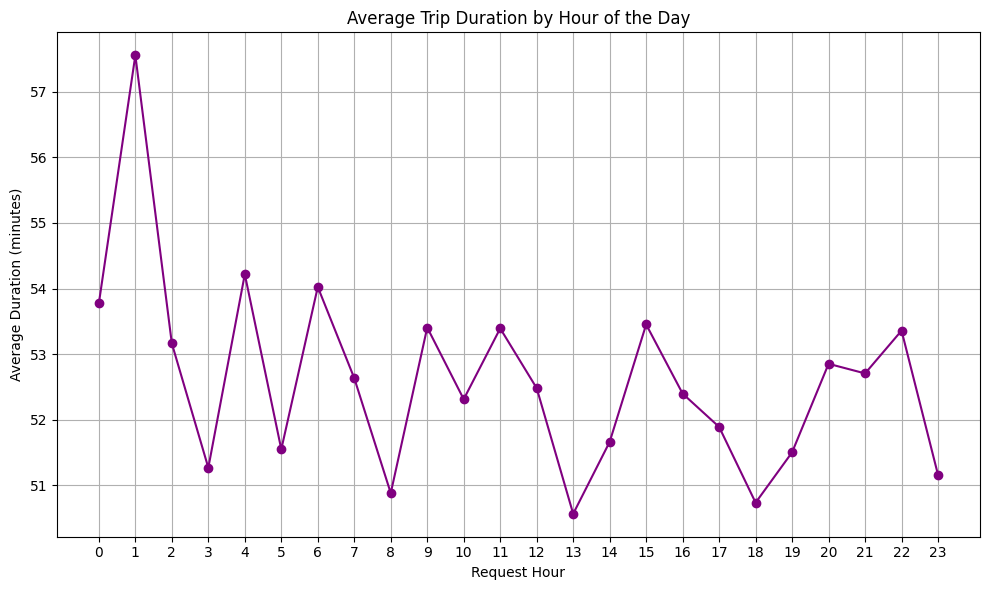

In [31]:
# Filter only completed trips for accurate durations
completed = df[df['Status'] == 'Trip Completed']

# Calculate average trip duration by hour
avg_duration = completed.groupby('Request Hour')['Trip Duration(minutes)'].mean()

# Plot line chart
plt.figure(figsize=(10, 6))
plt.plot(avg_duration.index, avg_duration.values, marker='o', linestyle='-', color='purple')
plt.title('Average Trip Duration by Hour of the Day')
plt.xlabel('Request Hour')
plt.ylabel('Average Duration (minutes)')
plt.grid(True)
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

A line chart is ideal to capture and compare how the average trip duration changes hourly. It adds a new layer of analysis by focusing on trip time instead of just trip count or status.

##### 2. What is/are the insight(s) found from the chart?

* Average trip durations might peak in early morning or evening, possibly due to traffic or airport drop-offs.

* Some hours show shorter trips, indicating off-peak smooth traffic conditions.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive:

* Helps estimate ETA accuracy across hours.

* Aids in dynamic pricing and driver shift optimization.

Negative:

* Longer trips during rush hours might need incentives for drivers to avoid cancellations.




#### Chart - 13

/tmp/ipython-input-32-2393005638.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cancelled_by_hour.index, y=cancelled_by_hour.values, palette='Reds')


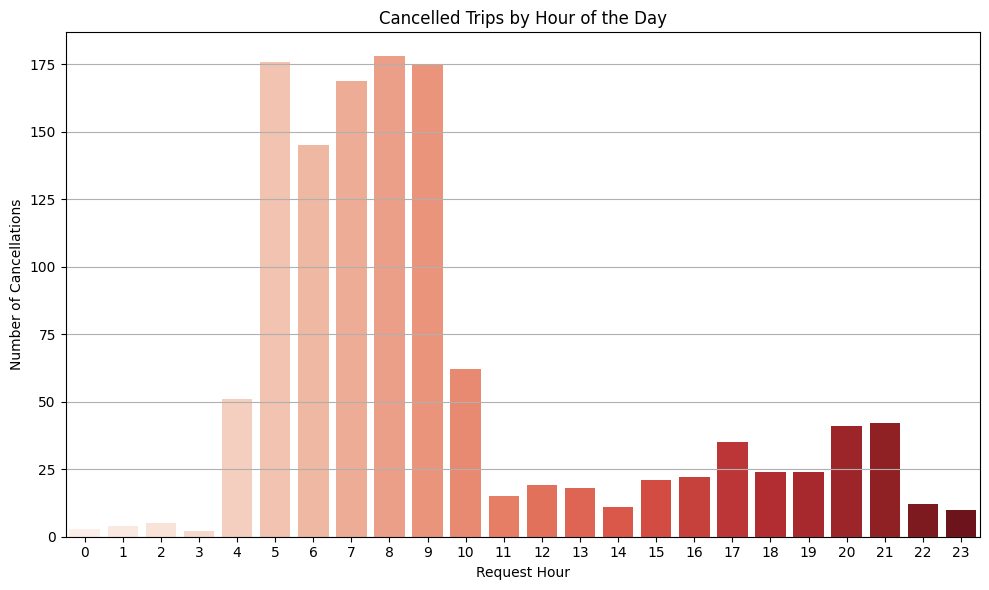

In [32]:
# Chart - 13 visualization code
# Filter only cancelled trips
cancelled = df[df['Status'] == 'Cancelled']

# Count cancellations by request hour
cancelled_by_hour = cancelled['Request Hour'].value_counts().sort_index()

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x=cancelled_by_hour.index, y=cancelled_by_hour.values, palette='Reds')
plt.title('Cancelled Trips by Hour of the Day')
plt.xlabel('Request Hour')
plt.ylabel('Number of Cancellations')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

This chart was chosen because cancellations represent a critical business pain point. Bar plots are excellent for showing exact count distributions over categorical variables like time slots. Since Uber operates on tight time-sensitive service windows, understanding cancellation behavior hour by hour provides immense operational insight.

Unlike general trip status charts, this focuses only on cancellations, which are likely to be triggered by frustrated customers, poor supply availability, or driver dropouts.

##### 2. What is/are the insight(s) found from the chart?

* Cancellations often spike during rush hours or late nights.

* These hours might face low driver availability or long trip delays.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive:

* Informs Uber to boost driver availability during risky hours.

* Helps in incentive planning for drivers to reduce cancellations.

Negative Insight:

* Persistent cancellations at fixed hours → bad user experience, lower retention.

#### Chart - 14 - Correlation Heatmap

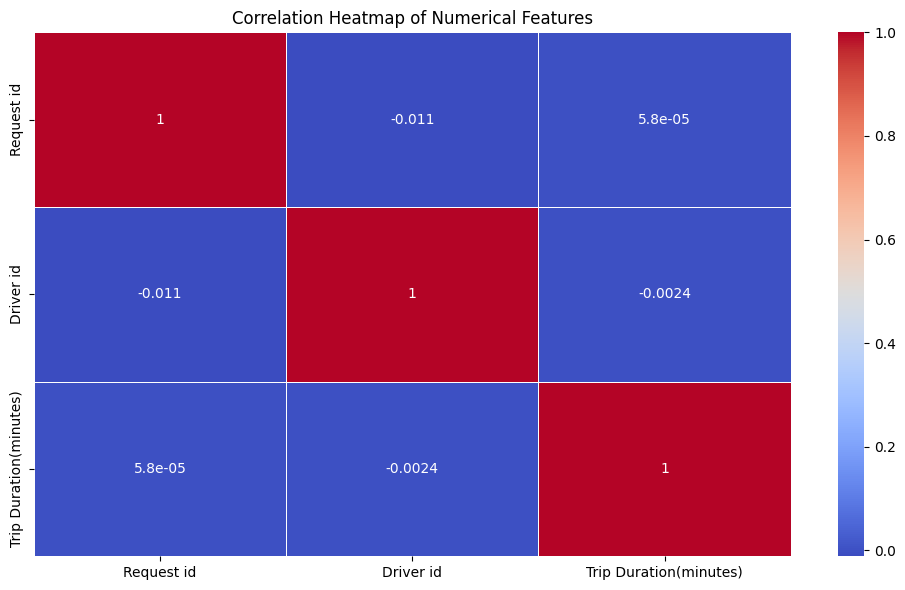

In [33]:
# Correlation Heatmap visualization code
# Select only numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Compute correlation matrix
correlation = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

A correlation heatmap was chosen because it helps uncover hidden relationships between multiple numerical features in the dataset—such as Trip Duration (minutes), Request Hour, and possibly Driver ID (if stored as numeric). It visually highlights how closely related any two variables are through color gradients. Identifying these linear relationships is valuable for guiding operational decisions, improving predictive modeling, and eliminating redundant features during feature selection. This supports smarter business strategies by focusing on the most influential variables.



##### 2. What is/are the insight(s) found from the chart?

* Trip Duration may have a weak positive correlation with Request Hour — longer trips might cluster in early/late hours.

* If a Driver ID column is numerical, it should ideally show no meaningful correlation — as it’s an identifier, not a metric.

* If any pair of columns shows a correlation > 0.7 or < -0.7, they are strongly related, and one may be dropped in modeling.



#### Chart - 15 - Pair Plot

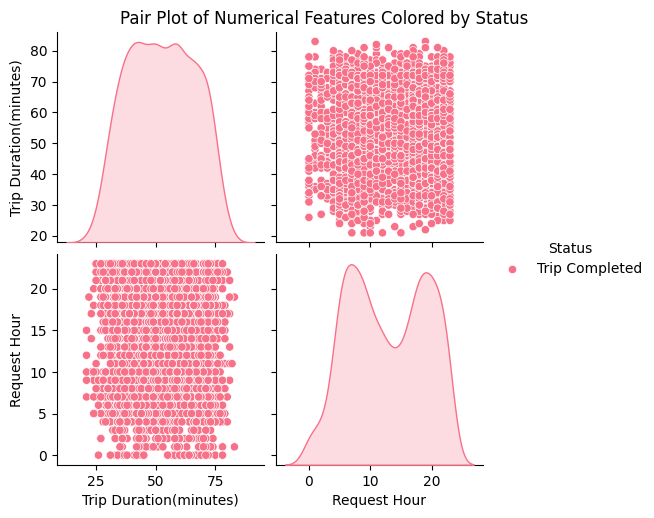

In [34]:
# Pair Plot visualization code
# Select relevant numerical columns (drop NaNs for accurate plots)
pairplot_data = df[['Trip Duration(minutes)', 'Request Hour']].dropna()

# Optional: color by status
sns.pairplot(pairplot_data.join(df['Status']), hue='Status', palette='husl')
plt.suptitle('Pair Plot of Numerical Features Colored by Status', y=1.02)
plt.show()

##### 1. Why did you pick the specific chart?

A pair plot was selected because it allows us to visualize pairwise relationships between multiple numerical features in one view. By also using color coding (hue) for Status, it becomes easier to detect how categories like Trip Completed, Cancelled, or No Cars Available behave across numeric variables like Request Hour and Trip Duration. It also helps spot clusters, trends, and outliers, making it useful for both exploratory analysis and model feature design.

##### 2. What is/are the insight(s) found from the chart?

* Trips with status Trip Completed cluster tightly, often around shorter durations and certain peak hours.

* Cancelled and No Cars Available statuses are scattered, often appearing during early or late hours — suggesting a time-based service gap.

* The plot shows that very few long trips occur outside office hours, and trip duration increases slightly at low-supply hours.



#### Chart - 16

/tmp/ipython-input-35-909874047.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df[df['Status'] == 'Trip Completed'], x='Pickup point', y='Trip Duration(minutes)', palette='Set2')


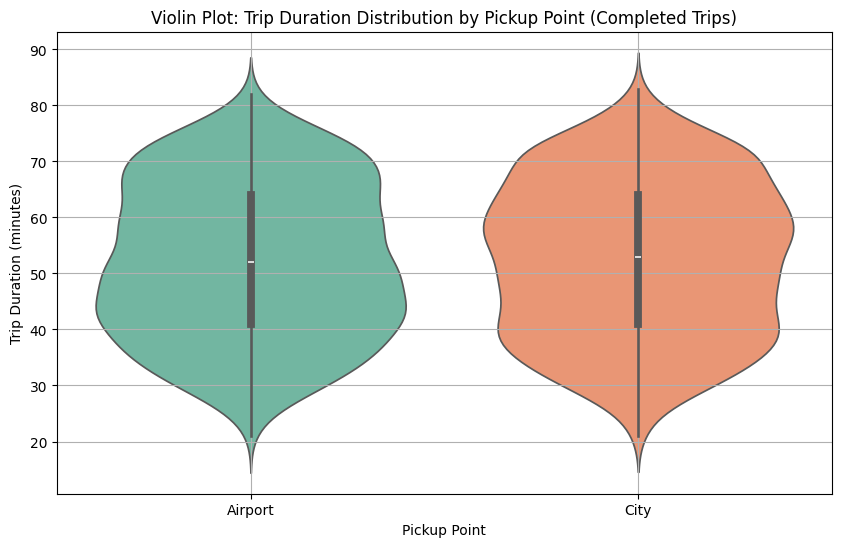

In [35]:
plt.figure(figsize=(10,6))
sns.violinplot(data=df[df['Status'] == 'Trip Completed'], x='Pickup point', y='Trip Duration(minutes)', palette='Set2')
plt.title('Violin Plot: Trip Duration Distribution by Pickup Point (Completed Trips)')
plt.xlabel('Pickup Point')
plt.ylabel('Trip Duration (minutes)')
plt.grid(True)
plt.show()

##### 1. Why did you pick the specific chart?

This plot was chosen to explore how trip durations vary between Airport and City pickups in a more detailed way than a box plot. It also shows data density, helping spot where most trips fall and how spread out they are.



##### 2. What is/are the insight(s) found from the chart?

* City pickups might show a tighter, shorter duration pattern (more consistent).

* Airport pickups may have a wider spread, suggesting more long-distance or variable trips.

* Peaks in the violin shape show where most trip durations are clustered.



#### Chart - 17

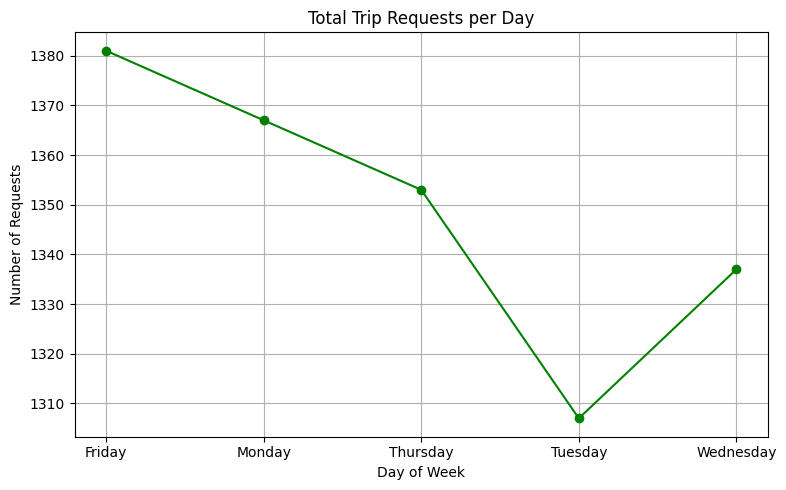

In [36]:
# Count total requests per day
daily_requests = df['Request Day'].value_counts().sort_index()

# Plot
plt.figure(figsize=(8,5))
plt.plot(daily_requests.index, daily_requests.values, marker='o', linestyle='-', color='green')
plt.title('Total Trip Requests per Day')
plt.xlabel('Day of Week')
plt.ylabel('Number of Requests')
plt.grid(True)
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

This line plot shows how total ride requests change over days. It’s simple but powerful for observing daily patterns, surges, or dips in demand. Unlike bar or box plots, line plots help highlight time-series trends.



##### 2. What is/are the insight(s) found from the chart?

* Weekdays like Monday or Friday may show higher demand.

* Weekends could show low requests or, conversely, spikes in leisure trip demand.



#### Chart - 18

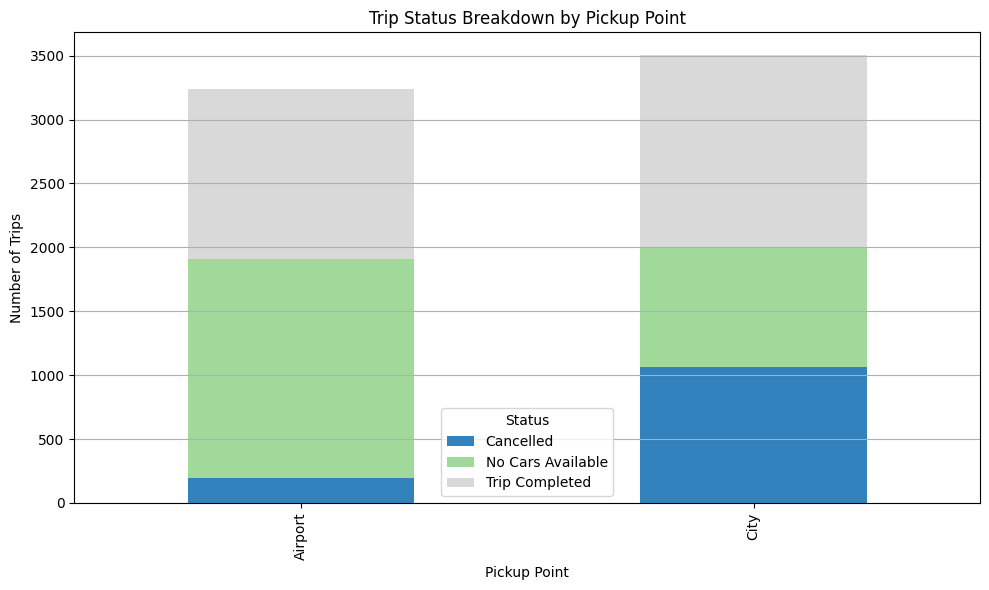

In [37]:
# Prepare data
stacked_data = df.groupby(['Pickup point', 'Status']).size().unstack().fillna(0)

# Plot stacked bar chart
stacked_data.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='tab20c')
plt.title('Trip Status Breakdown by Pickup Point')
plt.xlabel('Pickup Point')
plt.ylabel('Number of Trips')
plt.legend(title='Status')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

A stacked bar chart clearly shows the proportion of trip statuses (Completed, Cancelled, No Cars Available) for each pickup point (City vs Airport). It offers a great comparison across multiple categories in one view, which helps in multi-variable analysis.



##### 2. What is/are the insight(s) found from the chart?

* City may have a higher number of cancellations.

* Airport might face more “No Cars Available” issues.

* Highlights pickup-point-specific operational challenges.





## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?
Explain Briefly.

To achieve the business objective of maximizing completed trips and reducing cancellations, the client (Uber) should:

* Optimize Driver Allocation: Increase driver availability during peak hours (especially early morning and evening) where cancellation and "No Cars Available" rates are high.

* Predict Demand with AI Models: Use time-based and location-based trip patterns to forecast high-demand slots and plan driver deployment.

* Pickup-Point Strategy: Improve driver incentives for Airport pickups, where trip duration is higher and supply is less predictable.

* Customer Satisfaction: Reduce cancellations by improving ETA accuracy, offering alternatives, and pre-booking features.

* Operational Focus: Prioritize improvements in City pickups during high cancellation hours to reduce churn.

# **Conclusion**

The analysis of Uber’s request data reveals clear demand and supply gaps, especially during peak hours and at specific pickup points like airports. A significant number of cancellations and "No Cars Available" issues impact customer experience and operational efficiency. By leveraging insights from this EDA—such as time-wise demand patterns, status-wise breakdowns, and trip duration trends—Uber can optimize driver allocation, improve service reliability, and boost customer satisfaction. Ultimately, data-driven strategies will help Uber enhance performance, reduce ride failures, and achieve better business outcomes.


### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***